## Logestic regression

In [4]:
#Load the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/crrcoe/master/2020-02-04/diabetes.csv")
data.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
698,4,127,88,11,155,34.5,0.598,28,0


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# seperate the dataset in features and target variable.
feature_cols = ['Pregnancies','Glucose','BloodPressure',
                'SkinThickness','Insulin','BMI',
            'DiabetesPedigreeFunction','Age']
X = data[feature_cols] #features
y = data.Outcome #target variable

In [9]:
X.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
329,6,105,70,32,68,30.8,0.122,37


In [11]:
data.shape

(768, 9)

In [10]:
#split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.25,
                                                 random_state = 0)

#Here,the dataset is broken into two parts in a ratio of 75:25.It means 75% data will be used for model training and 25% for model testing

In [12]:
#import the class


from sklearn.linear_model import LogisticRegression

In [13]:
#instantiate the model with default parameters
logreg = LogisticRegression()
#fit the model with data
logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [15]:
#confusion matrix evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("Precision:",metrics.precision_score(y_test,y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


Precision :Precision is about being precise i.e.,how accurate your model is.In other words,you can say when a model makes a prediction,how often it is correct.

Recall :If there are patients who have diabetes in test set and how your Logistic Regression model can identify (58%) of the time.

Here,you can see the confusion matrix in the form of array object,with the dimensions 2*2 as it comes under binary classification,we have two classes 0 and 1.Diagonal values represent accurate predictions,while non-diagonal elements represent inaccurate predictions.

In [19]:
type(cnf_matrix)

numpy.ndarray

In [22]:
print(type(pd.DataFrame(cnf_matrix)))
pd.DataFrame(cnf_matrix)

<class 'pandas.core.frame.DataFrame'>


,0,1
0,119,11
1,26,36


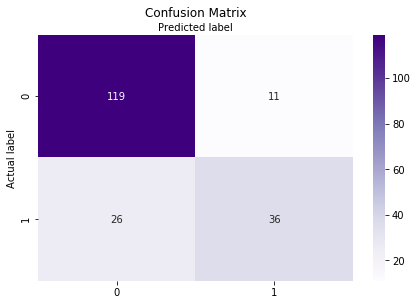

In [17]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0,1] #names of classes
fig,ax = plt.subplots()
tick_marks =np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = 'Purples',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()

ROC Curve shows the tradeoff between sensitivity and specificity

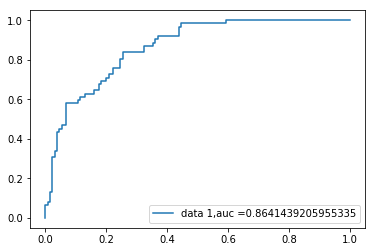

In [24]:
y_predict_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_= metrics.roc_curve(y_test,y_predict_proba)
auc = metrics.roc_auc_score(y_test,y_predict_proba)
plt.plot(fpr,tpr,label = "data 1,auc ="+str(auc))
plt.legend(loc = 'best')
plt.show()

AUC score for this case is 0.86,score approx 1 represents the perfect classsifier,and 0.5 rep a worthless classifier

In [28]:
from sklearn.datasets import load_iris
data = load_iris()

In [29]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
import pandas as pd
x = pd.DataFrame(data.data, columns=data.feature_names)

In [35]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [38]:
Y = data.target

In [39]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])